In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
dataset = pd.read_csv('browser_os_dataset_v2.csv')
dataset.head()

,flow,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,std_fiat,...,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,avgPacketSize,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond,label
0,10.0.2.15:51163<->192.168.0.1:53,0.000000,0.000000,1.649082e+09,0.000000,1.649082e+09,1.649082e+09,0.000000,0.000000,0.000000,...,89.000000,105.000000,0.000000,0.000000,97.000000,315.756236,315.756236,631.512472,61256.709820,Kali_Chrome
1,10.0.2.15:37349<->192.168.0.1:53,0.000000,0.000000,1.649082e+09,0.000000,1.649082e+09,1.649082e+09,0.000000,0.000000,0.000000,...,79.000000,95.000000,0.000000,0.000000,87.000000,129.718511,129.718511,259.437022,22571.020885,Kali_Chrome
2,10.0.2.15:60138<->74.125.131.94:443,46.615489,46.591534,1.500000e-05,0.000161,4.651523e+01,4.651523e+01,4.237772,4.659153,14.021851,...,143.833333,571.909091,160.995671,980.444843,348.565217,0.257423,0.235971,0.493395,171.980231,Kali_Chrome
3,10.0.2.15:46728<->173.194.222.84:443,46.608430,46.587977,1.080000e-04,0.000000,4.651330e+01,4.651330e+01,3.329174,3.583691,12.429250,...,139.333333,572.857143,169.354517,920.390373,348.620690,0.321828,0.300372,0.622200,216.911786,Kali_Chrome
4,10.0.2.15:49245<->239.255.255.250:49245,3.005867,0.000000,1.000164e+00,0.000000,1.005063e+00,1.005063e+00,1.001956,0.000000,0.002702,...,214.000000,0.000000,0.000000,0.000000,214.000000,1.330731,0.000000,1.330731,284.776406,Kali_Chrome


In [4]:
print("Размеры:",dataset.shape)
print("Cтолбцы:",dataset.columns)

Размеры: (6530, 30)
Cтолбцы: Index(['flow', 'total_fiat', 'total_biat', 'min_fiat', 'min_biat', 'max_fiat',
       'max_biat', 'mean_fiat', 'mean_biat', 'std_fiat', 'std_biat',
       'feduration', 'total_fpackets', 'total_bpackets', 'total_fpktl',
       'total_bpktl', 'min_fpktl', 'min_bpktl', 'max_fpktl', 'max_bpktl',
       'mean_fpktl', 'mean_bpktl', 'std_fpktl', 'std_bpktl', 'avgPacketSize',
       'fPktsPerSecond', 'bPktsPerSecond', 'flowPktsPerSecond',
       'flowBytesPerSecond', 'label'],
      dtype='object')


In [5]:
dataset.corr()

,total_fiat,total_biat,min_fiat,min_biat,max_fiat,max_biat,mean_fiat,mean_biat,std_fiat,std_biat,...,max_bpktl,mean_fpktl,mean_bpktl,std_fpktl,std_bpktl,avgPacketSize,fPktsPerSecond,bPktsPerSecond,flowPktsPerSecond,flowBytesPerSecond
total_fiat,1.000000,0.965690,-0.278796,0.156943,-0.278796,-0.278796,0.500470,0.474416,0.778031,0.726434,...,0.243903,0.030214,0.243206,0.182690,0.278291,0.222584,-0.008445,-0.008185,-0.008315,-0.007195
total_biat,0.965690,1.000000,-0.269152,0.162124,-0.269152,-0.269152,0.476520,0.500838,0.744216,0.762149,...,0.252483,-0.014499,0.252036,0.207282,0.287841,0.210855,-0.008232,-0.007968,-0.008100,-0.006981
min_fiat,-0.278796,-0.269152,1.000000,-0.042883,1.000000,1.000000,-0.165933,-0.150068,-0.263528,-0.250385,...,-0.171404,-0.259397,-0.189397,-0.327501,-0.247718,-0.257885,0.024721,0.024844,0.024782,0.019966
min_biat,0.156943,0.162124,-0.042883,1.000000,-0.042883,-0.042883,0.827558,0.855135,-0.018698,-0.024622,...,-0.021396,-0.037918,-0.027401,-0.038286,-0.029651,-0.036338,-0.001344,-0.001330,-0.001337,-0.001274
max_fiat,-0.278796,-0.269152,1.000000,-0.042883,1.000000,1.000000,-0.165933,-0.150068,-0.263528,-0.250385,...,-0.171404,-0.259397,-0.189397,-0.327501,-0.247718,-0.257885,0.024721,0.024844,0.024782,0.019966
max_biat,-0.278796,-0.269152,1.000000,-0.042883,1.000000,1.000000,-0.165933,-0.150068,-0.263528,-0.250385,...,-0.171404,-0.259397,-0.189397,-0.327501,-0.247718,-0.257885,0.024721,0.024844,0.024782,0.019966
mean_fiat,0.500470,0.476520,-0.165933,0.827558,-0.165933,-0.165933,1.000000,0.939212,0.419860,0.401003,...,-0.004842,-0.014462,-0.011914,0.006450,0.014773,-0.021640,-0.005074,-0.005021,-0.005047,-0.004795
mean_biat,0.474416,0.500838,-0.150068,0.855135,-0.150068,-0.150068,0.939212,1.000000,0.401888,0.448748,...,0.001395,-0.056284,-0.007804,0.023887,0.022708,-0.038046,-0.004716,-0.004664,-0.004690,-0.004460
std_fiat,0.778031,0.744216,-0.263528,-0.018698,-0.263528,-0.263528,0.419860,0.401888,1.000000,0.925400,...,0.106236,0.003775,0.116190,0.127236,0.177858,0.086008,-0.008053,-0.007952,-0.008003,-0.007530
std_biat,0.726434,0.762149,-0.250385,-0.024622,-0.250385,-0.250385,0.401003,0.448748,0.925400,1.000000,...,0.108658,-0.039493,0.110194,0.144160,0.181869,0.058424,-0.007754,-0.007660,-0.007707,-0.007272


In [6]:
dataset.drop(columns = ['total_biat'],axis = 1, inplace=True)
dataset.drop(columns = ['feduration'],axis = 1, inplace=True)
dataset.drop(columns = ['fPktsPerSecond'],axis = 1, inplace=True)
dataset.drop(columns = ['bPktsPerSecond'],axis = 1, inplace=True)
dataset.drop(columns = ['flowPktsPerSecond'],axis = 1, inplace=True)

In [7]:
factor = pd.factorize(dataset['label'])
dataset['label'] = factor[0]
definitions = factor[1]
definitions
dataset['label']

0        0
1        0
2        0
3        0
4        0
        ..
6525    16
6526    16
6527    16
6528    16
6529    16
Name: label, Length: 6530, dtype: int64

In [8]:
models = [
          RandomForestRegressor(n_estimators=500, max_features=13),
          DecisionTreeClassifier(random_state=21),
          KNeighborsRegressor(n_neighbors=10),
          ExtraTreeClassifier(random_state=21)
]

In [9]:
X = dataset.iloc[:,1:24].values
y = dataset.iloc[:,24].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 21)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
TestModels = pd.DataFrame()
tmp = {}
for model in models:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    model.fit(X_train, y_train)
    tmp['R2_Label'] = r2_score(y_test, model.predict(X_test))
    TestModels = TestModels.append([tmp])
    
TestModels.set_index('Model', inplace=True)

C:\Users\Валерия\AppData\Local\Temp\ipykernel_14260\1822462882.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
C:\Users\Валерия\AppData\Local\Temp\ipykernel_14260\1822462882.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
C:\Users\Валерия\AppData\Local\Temp\ipykernel_14260\1822462882.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])
C:\Users\Валерия\AppData\Local\Temp\ipykernel_14260\1822462882.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  TestModels = TestModels.append([tmp])


<AxesSubplot:title={'center':'R2_OS_Browser'}, xlabel='Model'>

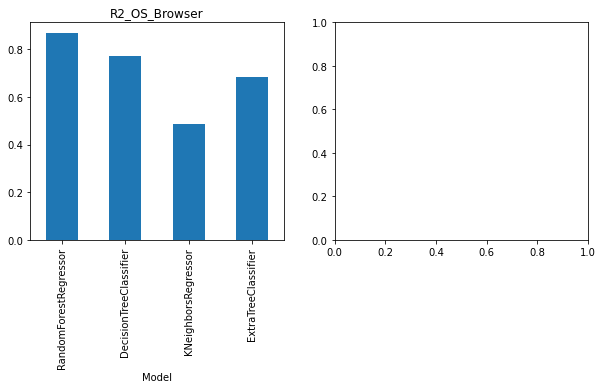

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Label.plot(ax=axes[0], kind='bar', title='R2_OS_Browser')

In [13]:
model = models[0]
print("Процент правильных ответов модели на алгоритме RandomForestRegressor равно ",r2_score(y_test, model.predict(X_test))*100,"%")


Процент правильных ответов модели на алгоритме RandomForestRegressor равно  87.06217346913309 %
